PPGCC - Programa de Pós-Graduação em Ciência da Computação 

Disciplina de Aprendizado de Máquina em Grafos

Atividade 1 - 800 pts

Matheus Santos Araújo

# Importações

In [1]:
import os
import os.path as osp
import pickle
import logging

import torch
from torch_geometric import utils
from torch_geometric.data import (InMemoryDataset, download_url, extract_zip,
                                  Data)
from torch_geometric.utils import remove_self_loops
from torch_geometric.datasets import GNNBenchmarkDataset

import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from grakel.datasets import fetch_dataset
from grakel.utils import graph_from_networkx
from grakel.graph_kernels import GraphKernel

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.linalg import inv

# Dataset e Kernel Weisfeiler-Lehman

1) Obtenha um método para calcular o Kernel Weisfeiler-Lehman que permita calcular o vetor de features de cada grafo no dataset. Você pode implementar ou utilizar bibliotecas existentes.

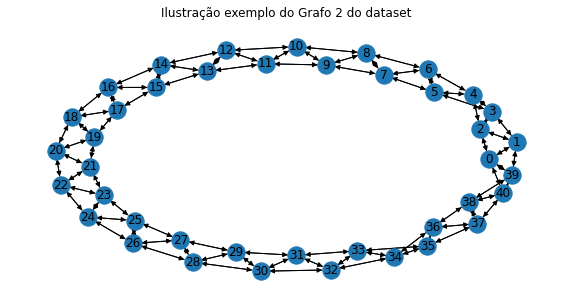

In [2]:
# dataset CSL do torch
dataset = GNNBenchmarkDataset(root = '~/', name = 'CSL')
# labels iniciais (cores) de cada nó
labels = {0 : '0', 1 : '1', 2 : '2', 3 : '3', 4 : '4', 5 : '5', 6 : '6', 7 : '7', 8 : '8', 9 : '9', 10 : '10', 11 : '11', 12 : '12', 13 : '13', 14 : '14', 15 : '15', 16 : '16', 17 : '17', 18 : '18', 19 : '19', 20 : '20', 21 : '21', 22 : '22', 23 : '23', 24 : '24', 25 : '25', 26 : '26', 27 : '27', 28 : '28', 29 : '29', 30 : '30', 31 : '31', 32 : '32', 33 : '33', 34: '34', 35 : '35', 36 : '36', 37 : '37', 38 : '38', 39 : '39', 40 : '40'}

# Classes
y = dataset.data.y
y = y.numpy()

# convertendo p/ nx
graphs = []
for i in range (len(y)):
    # Adiciona grafo networkx 
    graphs.append(utils.to_networkx(dataset[i]))
    # label inicial (cor) em cada nó
    # labels = dict(graphs[i].degree)
    nx.set_node_attributes(graphs[i], labels, 'labels')

    
# Exemplo ilustrativo (sexto grafo do dataset)
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_title('Ilustração exemplo do Grafo 2 do dataset')
nx.draw_kamada_kawai(graphs[1], with_labels=True, ax=ax)

# Validacao cruzada    
G_train, G_test, y_train, y_test = train_test_split(graphs, y, test_size=0.2, random_state=18)

# convertendo p/ grakel
G_train = graph_from_networkx(G_train, node_labels_tag='labels')
G_test = graph_from_networkx(G_test, node_labels_tag='labels')

# Kernel Weisfeiler-Lehman Subtree features
wl = GraphKernel(kernel=[{"name": "weisfeiler_lehman", "n_iter": 5}], normalize=True)
K_train = wl.fit_transform(G_train)

K_test = wl.transform(G_test)

# Modelo
2) Treine o modelo de ML baseado em Kernels de sua preferência (caso não tenha familiaridade, recomendo utilizar o SVM e ler tutoriais para iniciantes tal como https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989 ). O Kernel utilizado deve ser o de Weisfeiler-Lehman, que utiliza o produto escalar dos vetores de features obtidos pelo método de refinamento de coloração. Você terá que explicar todas as decisões tomadas, como a separação dos dados de treino, validação e teste, definição de parâmetros e porque o seu modelo pode ser considerado equilibrado.


## Treino 

In [3]:
tree = DecisionTreeClassifier()
tree.fit(K_train, y_train)
y_pred = tree.predict(K_test)
print("Classes reais")
print(y_test)
print('Classes preditas')
print(y_pred)

Classes reais
[5 6 5 0 2 1 8 2 6 5 9 3 1 7 2 3 1 7 0 2 4 9 8 4 7 3 3 0 7 7]
Classes preditas
[5 6 5 0 2 1 8 2 6 5 9 3 1 7 2 3 1 7 0 2 4 9 8 4 7 3 3 0 7 7]


## Resultados Obtidos

In [4]:
acc = accuracy_score(y_test, y_pred)
print("Acurácia:", str(round(acc*100, 2)) + "%")

Acurácia: 100.0%


## Gráficos

3) Apresente os resultados obtidos pelo seu modelo, utilizando uma matriz de confusão e as métricas de acurácia e precisão.

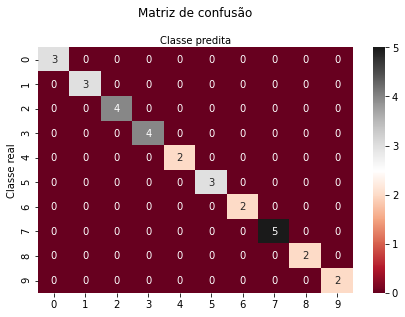

In [5]:
def matriz_confusao(real, predito):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Matriz de confusão', y=1.1)
    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.show()
    
matriz_confusao(y_test, y_pred)        